In [1]:
# edstays, diagnosis and triage with respect to admission rates, length of stay, and mortality

In [1]:
import pandas as pd
from capstone_functions import *

In [2]:
diagsnosis = look_n_load('IN/diagnosis.csv')
edstays = look_n_load('edstays2.csv')
triage = look_n_load('IN/triage.csv')


Shape: (946692, 6)

Columns: ['subject_id', 'stay_id', 'seq_num', 'icd_code', 'icd_version', 'icd_title']

Missing proportions:
 subject_id     0.0
stay_id        0.0
seq_num        0.0
icd_code       0.0
icd_version    0.0
icd_title      0.0
dtype: float64

Data:
    subject_id   stay_id  seq_num icd_code  icd_version  \
0    10000032  32952584        1     4589            9   
1    10000032  32952584        2     7070            9   
2    10000032  32952584        3      V08            9   
3    10000032  33258284        1     5728            9   
4    10000032  33258284        2    78959            9   

                                           icd_title  
0                                    HYPOTENSION NOS  
1  UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...  
2                         ASYMPTOMATIC HIV INFECTION  
3                           OTH SEQUELA, CHR LIV DIS  
4                                      OTHER ASCITES  

Shape: (428284, 18)

Columns: ['Unnamed: 0', 'subject

In [3]:
# check 1:1 for all subject/stay IDs
print(edstays[['subject_id', 'stay_id']].value_counts()[:1])
print(triage[['subject_id', 'stay_id']].value_counts()[:1])
print(diagsnosis[['subject_id', 'stay_id']].value_counts()[:1])

# diagnosis will need to be reduced somehow

subject_id  stay_id 
10000032    32952584    1
dtype: int64
subject_id  stay_id 
10000032    32952584    1
dtype: int64
subject_id  stay_id 
10302129    30626695    9
dtype: int64


In [4]:
print('edstays:', len(edstays))
print('triage:', len(triage))
edstays_triage = pd.merge(edstays, triage, on=['subject_id','stay_id'], how='inner')
print('Both:', len(edstays_triage)) # every edstay (filtered)

edstays: 428284
triage: 447712
Both: 428284


In [9]:
edstays_triage[edstays_triage.nights < 0][['admitted']].value_counts()

admitted
0           4594
1           3577
dtype: int64

In [10]:
edstays_triage.admitted.value_counts()

0    254545
1    173739
Name: admitted, dtype: int64

In [28]:
import sweetviz as sv
drop_cols = ['Unnamed: 0', 'subject_id', 'hadm_id', 'stay_id', 'chiefcomplaint']
edstays_triage = edstays_triage[~edstays_triage.nights < 0]
report = sv.analyze(edstays_triage.drop(columns=drop_cols))
report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [37]:
edstays_triage[edstays_triage.temperature<10][['subject_id','stay_id','temperature','heartrate', 
                                               'resprate', 'o2sat', 'dbp', 'sbp', 'pain', 'acuity']]

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,dbp,sbp,pain,acuity
186,10003299,33704632,9.00,70.0,18.0,99.0,55.0,132.0,6,3.0
10022,10246115,38192812,9.00,73.0,16.0,100.0,65.0,121.0,8,3.0
25053,10591889,37389665,9.70,92.0,18.0,100.0,116.0,162.0,0,1.0
28574,10671868,34518460,9.10,100.0,14.0,100.0,88.0,132.0,0,2.0
32017,10749769,30879861,9.00,88.0,20.0,99.0,80.0,133.0,10,3.0
...,...,...,...,...,...,...,...,...,...,...
369076,18614569,36885890,0.10,82.0,20.0,97.0,61.0,143.0,7,2.0
379106,18847956,31826053,0.98,91.0,16.0,97.0,84.0,149.0,10,3.0
383188,18940100,39039656,7.90,100.0,18.0,100.0,67.0,118.0,7,3.0
410212,19578990,39803367,9.80,95.0,18.0,100.0,86.0,122.0,0,3.0


In [39]:
edstays_triage[edstays_triage.dbp>1000][['subject_id','stay_id','temperature','heartrate', 
                                               'resprate', 'o2sat', 'dbp', 'sbp', 'pain', 'acuity']]

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,dbp,sbp,pain,acuity
340,10007232,31834433,97.5,82.0,18.0,100.0,1040.0,157.0,0,3.0
5915,10142844,30321779,98.1,90.0,18.0,97.0,1112.0,115.0,10,2.0
6963,10165902,39299543,97.6,78.0,18.0,100.0,2109.0,14.0,0,2.0
17678,10419638,39943452,97.8,123.0,20.0,99.0,1102.0,148.0,10,3.0
24967,10590496,38355576,98.6,51.0,18.0,100.0,3732.0,11.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...
423111,19881159,31658020,98.0,94.0,18.0,94.0,8165.0,145.0,0,2.0
423148,19881566,31092304,97.0,150.0,18.0,99.0,5108.0,15.0,0,1.0
425572,19933115,38119458,97.9,70.0,16.0,100.0,661672.0,181.0,7,3.0
426639,19958954,31592990,101.9,98.0,28.0,99.0,8198.0,149.0,2,2.0


In [40]:
edstays_triage[edstays_triage.sbp>1000][['subject_id','stay_id','temperature','heartrate', 
                                               'resprate', 'o2sat', 'dbp', 'sbp', 'pain', 'acuity']]

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,dbp,sbp,pain,acuity
55275,11296936,32972370,978.0,87.0,NaN,95.0,NaN,12080.0,6,3.0
71011,11671335,36268868,97.0,102.0,16.0,100.0,NaN,151103.0,7,3.0
168424,13954266,32530795,98.8,93.0,18.0,98.0,84.0,18148.0,0,1.0
196883,14605826,38587721,98.7,95.0,18.0,100.0,NaN,9656.0,13,2.0


In [53]:
edstays_triage.pain = pd.to_numeric(edstays_triage.pain, errors='coerce')

triage.describe()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity
count,4.477120e+05,4.477120e+05,423117.000000,429754.000000,426337.000000,426063.000000,428487.000000,427644.000000,418114.000000,440384.000000
mean,1.500724e+07,3.499835e+07,98.013673,85.088328,17.598893,98.471797,135.403284,81.178964,4.426709,2.625395
std,2.879861e+06,2.887731e+06,3.950928,18.030826,22.329738,16.723457,236.442826,1030.367364,4.088870,0.708159
min,1.000003e+07,3.000001e+07,0.100000,1.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,1.000000
25%,1.251441e+07,3.250085e+07,97.500000,72.000000,16.000000,97.000000,120.000000,68.000000,0.000000,2.000000
50%,1.501858e+07,3.499505e+07,98.000000,84.000000,18.000000,99.000000,133.000000,77.000000,5.000000,3.000000
75%,1.749759e+07,3.750423e+07,98.600000,96.000000,18.000000,100.000000,148.000000,87.000000,8.000000,3.000000
max,1.999999e+07,3.999996e+07,986.000000,1228.000000,14169.000000,9322.000000,151103.000000,661672.000000,180.000000,5.000000


In [54]:
edstays_triage = edstays_triage[edstays_triage.temperature < 300] # 148C literally boiling
edstays_triage = edstays_triage[edstays_triage.heartrate < 500] # impossible 
edstays_triage = edstays_triage[edstays_triage.resprate < 1000] 
edstays_triage = edstays_triage[edstays_triage.o2sat < 9000] 
edstays_triage = edstays_triage[edstays_triage.sbp < 10000]
edstays_triage = edstays_triage[edstays_triage.dbp < 10000]
edstays_triage = edstays_triage[edstays_triage.pain < 101] 

In [ ]:
# acuity?

In [69]:
X_cols = ['gender', 'race', 'arrival_transport',
        'admission_hour', 'admission_day', 'temperature', 'heartrate',
       'resprate', 'o2sat', 'sbp', 'dbp', 'pain', 'acuity']

In [70]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

edstays_triage.gender = edstays_triage.gender.astype('category')
edstays_triage.race = edstays_triage.race.astype('category')
edstays_triage.arrival_transport = edstays_triage.arrival_transport.astype('category')

In [77]:
X = edstays_triage[X_cols]
Y = edstays_triage[['admitted']]

from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
X['race'] = lbl.fit_transform(X['race'].astype(str))
X['gender'] = lbl.fit_transform(X['gender'].astype(str))
X['arrival_transport'] = lbl.fit_transform(X['arrival_transport'].astype(str))

/home/das/anaconda3/envs/gdal_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/das/anaconda3/envs/gdal_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/das/anaconda3/envs/gdal_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [78]:
seed = 42
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed,
                                                   stratify=Y)



In [80]:
model = XGBClassifier()
model.fit(X_train, y_train)

/home/das/anaconda3/envs/gdal_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/das/anaconda3/envs/gdal_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:48:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
pred_probs = model.predict_proba(X_test)
pred_probs = [x[1] for x in pred_probs]
preds = model.predict(X_test)

pred_df = pd.DataFrame(data={ 
    'preds': list(preds),
    'pred_probs': pred_probs,
    'truth': list(y_test.admitted)})
pred_df.to_csv('Vanilla_XGB_Preds.csv')

In [103]:
cm = pd.crosstab(pred_df.preds, pred_df.truth)
cm

truth,0,1
preds,,
0,38782,12913
1,7796,15856


In [109]:
(38782+15856)/(38782+15856+7796+12913) # 72% accuracy for admission

0.7251516317836145

In [111]:
(15856)/(15856+7796) # 67% precision: when it thinks YES, how accurate is the YES

0.6703872822594283

In [113]:
(15856)/(15856+12913) # 55% recall: for all the YES how many did it catch? 

0.5511488060064653

In [118]:


import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0], max_display=len(X_cols))

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


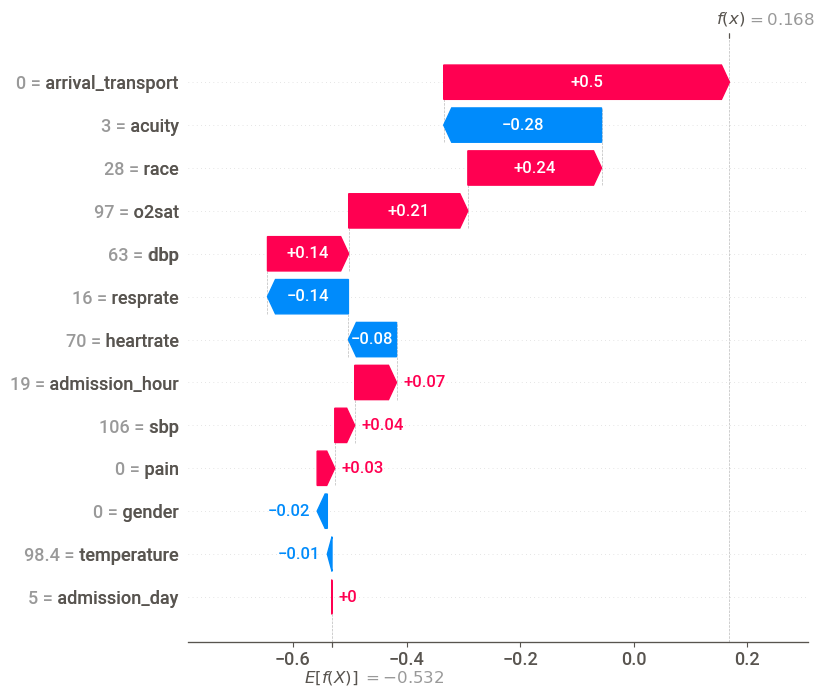

In [125]:
shap.plots.waterfall(shap_values[0], max_display=len(X_cols)) # example prediction

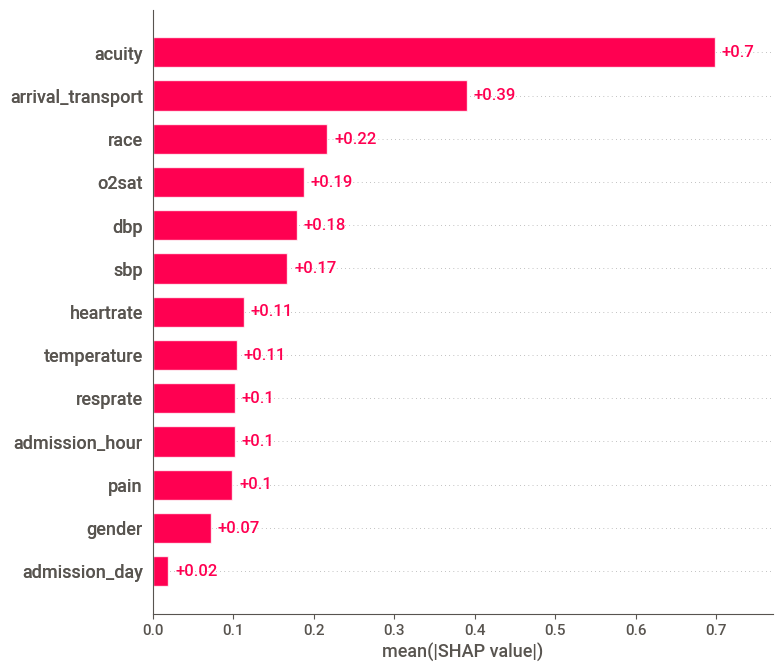

In [124]:
shap.plots.bar(shap_values, max_display=len(X_cols))

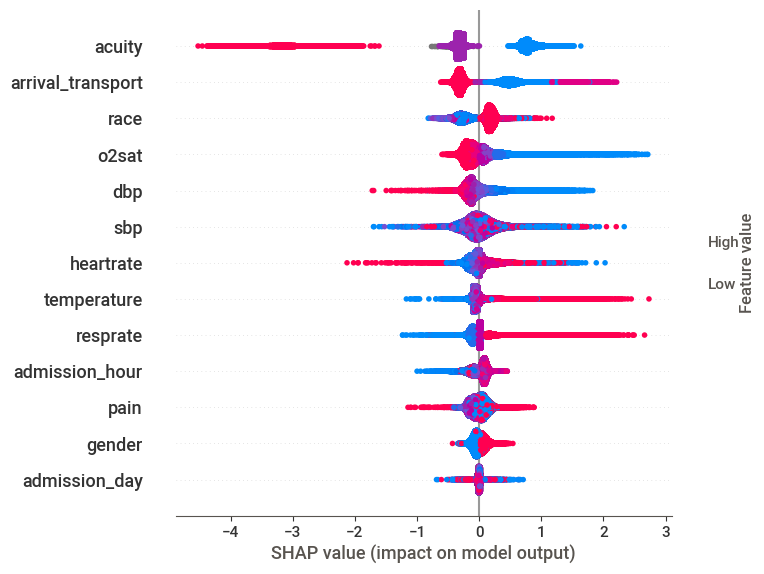

In [132]:
shap.plots.beeswarm(shap_values, max_display=len(X_cols))

In [ ]:
# length of stay in hours

In [197]:
X_cols = ['gender', 'race', 'arrival_transport',
        'admission_hour', 'admission_day', 'temperature', 'heartrate',
       'resprate', 'o2sat', 'sbp', 'dbp', 'pain', 'acuity']

edstays_triage_admitted = edstays_triage[edstays_triage.admitted==1]
X = edstays_triage_admitted[X_cols]
Y = edstays_triage_admitted[['nights']]

from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
X['race'] = lbl.fit_transform(X['race'].astype(str))
X['gender'] = lbl.fit_transform(X['gender'].astype(str))
X['arrival_transport'] = lbl.fit_transform(X['arrival_transport'].astype(str))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [198]:
seed = 42
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from xgboost import XGBRegressor
model = XGBRegressor(alpha=0.5)
model.fit(X_train, y_train)

# for CV go to: https://machinelearningmastery.com/xgboost-for-regression/

XGBRegressor(alpha=0.5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [199]:
model95 = XGBRegressor(alpha=0.95)
model95.fit(X_train, y_train)

XGBRegressor(alpha=0.95, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.949999988, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [200]:
model05 = XGBRegressor(alpha=0.05)
model05.fit(X_train, y_train)

XGBRegressor(alpha=0.05, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.0500000007, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [201]:
preds_reg50 = model.predict(X_test)
preds_reg95 = model95.predict(X_test)
preds_reg05 = model05.predict(X_test)

los_df = pd.DataFrame(data={
    'pred_05': preds_reg05,
    'pred_5': preds_reg50,
    'pred_95': preds_reg95,
    'actual': y_test.nights})
los_df

,pred_05,pred_5,pred_95,actual
123459,1.528952,3.182675,1.670722,0
191277,0.222226,0.415438,-0.118428,0
179412,3.141810,2.597169,3.070791,0
333081,-0.063814,0.134993,0.009693,0
216713,0.035124,-0.005297,-0.006336,0
...,...,...,...,...
72339,28.590891,27.150278,27.762581,30
120824,-0.019103,0.155487,0.101994,0
257602,-0.083852,0.309014,0.281975,0
86319,-0.265056,-0.072615,-0.211032,0


<AxesSubplot:xlabel='pred_95', ylabel='actual'>

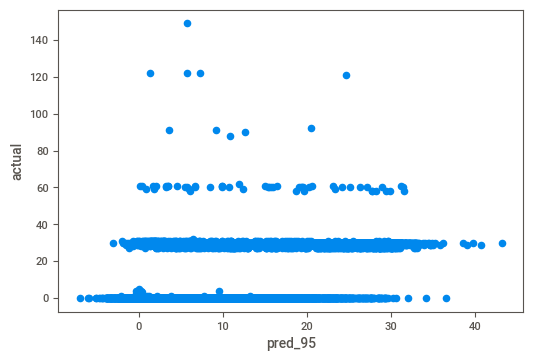

In [202]:
los_df.plot.scatter('pred_95', 'actual')

<AxesSubplot:ylabel='Frequency'>

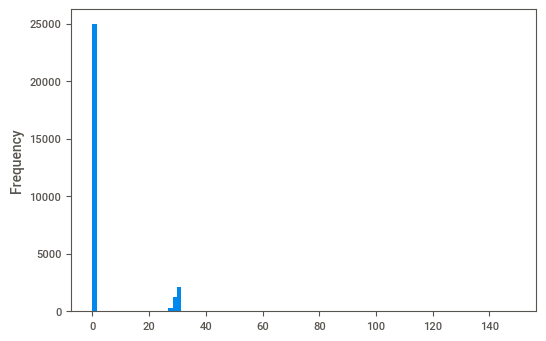

In [203]:
y_test.nights.plot.hist(bins=100)

In [204]:
los_df['diff'] = los_df['actual'] - los_df['pred_95']
import numpy as np
np.sqrt(np.mean(los_df['diff'] ** 2))

6.957687832478923

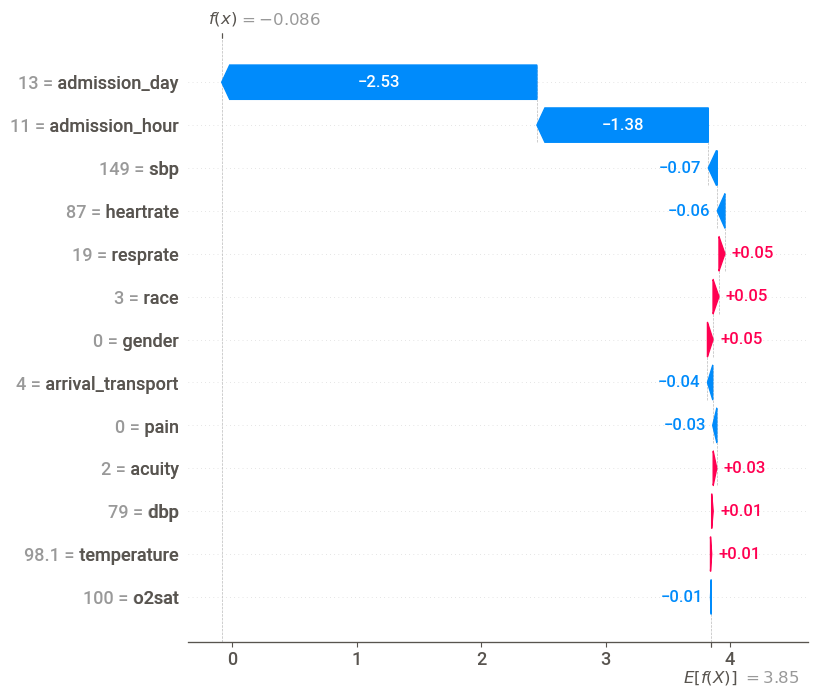

In [212]:
import shap
explainer = shap.Explainer(model95)
shap_values = explainer(X)

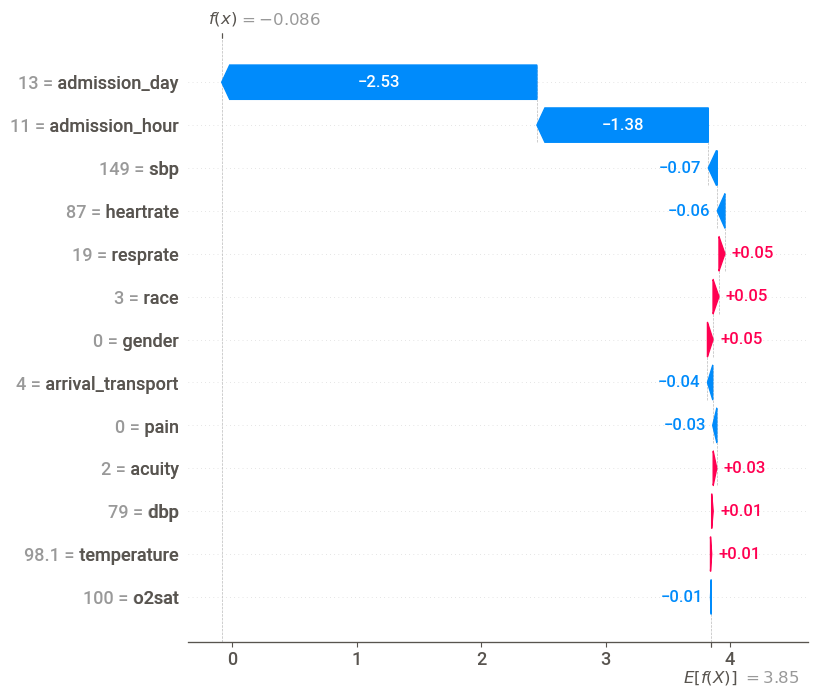

Nights: 0
Predicted: -0.3132147789001465


,gender,race,arrival_transport,admission_hour,admission_day,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity
274,F,ASIAN - CHINESE,WALK IN,11,13,98.1,87.0,19.0,100.0,149.0,79.0,0.0,2.0


In [228]:
n = 100
shap.plots.waterfall(shap_values[n], max_display=len(X_cols))

print('Nights:', edstays_triage_admitted[100:101].nights.values[0])
print('Predicted:', list(los_df['pred_95'])[n])
edstays_triage_admitted[100:101][X_cols]